<a href="https://colab.research.google.com/github/dilia-w/Visao-Computacional/blob/main/08_Obten%C3%A7%C3%A3o_de_pontos_de_interesse_com_o_algoritmo_SIFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

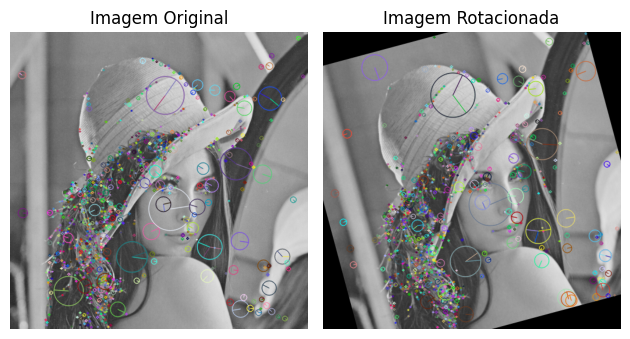

In [1]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

# Fazendo o download da imagem de Lena
image_url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
urllib.request.urlretrieve(image_url, 'lena_gray.png')

# Lendo a imagem em escala de cinza
imagem = cv2.imread('lena_gray.png', cv2.IMREAD_GRAYSCALE)
altura, largura = imagem.shape[:2]
centro = (largura // 2, altura // 2)
angulo = 15

# Criando a matriz de rotação e rotacionando a imagem
rotacao_matriz = cv2.getRotationMatrix2D(centro, angulo, 1)
imagem_rotacionada = cv2.warpAffine(imagem, rotacao_matriz, (largura, altura))

# Detectando os pontos chave usando o SIFT
sift = cv2.SIFT_create()
keypoints = sift.detect(imagem, None)
keypoints_rotacao = sift.detect(imagem_rotacionada, None)

# Desenhando os pontos chave nas imagens
imagem_sift = cv2.drawKeypoints(imagem, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
imagem_sift_rotacao = cv2.drawKeypoints(imagem_rotacionada, keypoints_rotacao, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Exibindo as imagens
plt.figure()
plt.subplot(1,2,1)
plt.imshow(imagem_sift, cmap='gray')
plt.axis('off')
plt.title('Imagem Original')

plt.subplot(1,2,2)
plt.imshow(imagem_sift_rotacao, cmap='gray')
plt.axis('off')
plt.title('Imagem Rotacionada')

plt.tight_layout()
plt.show()
